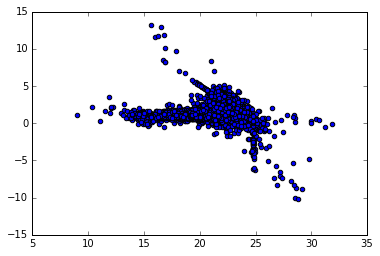

In [5]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer
import matplotlib.pyplot as plt
query = 'select top 10000 g, r, g-r as color_gr from photoobj'
result = CasJobs.executeQuery(query,'dr13')
plt.scatter(result['r'], result['color_gr'])
plt.show()

## Science in two tweets!

In [6]:
import SciServer.CasJobs as c, matplotlib.pyplot as p
print('ok')

ok


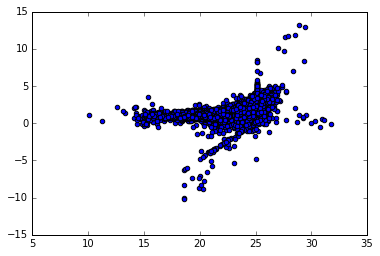

In [7]:
r = c.executeQuery('select top 10000 g,r,g-r as x from photoobj','dr13')
p.scatter(r['g'],r['x'])

## Cleaner version of same analysis

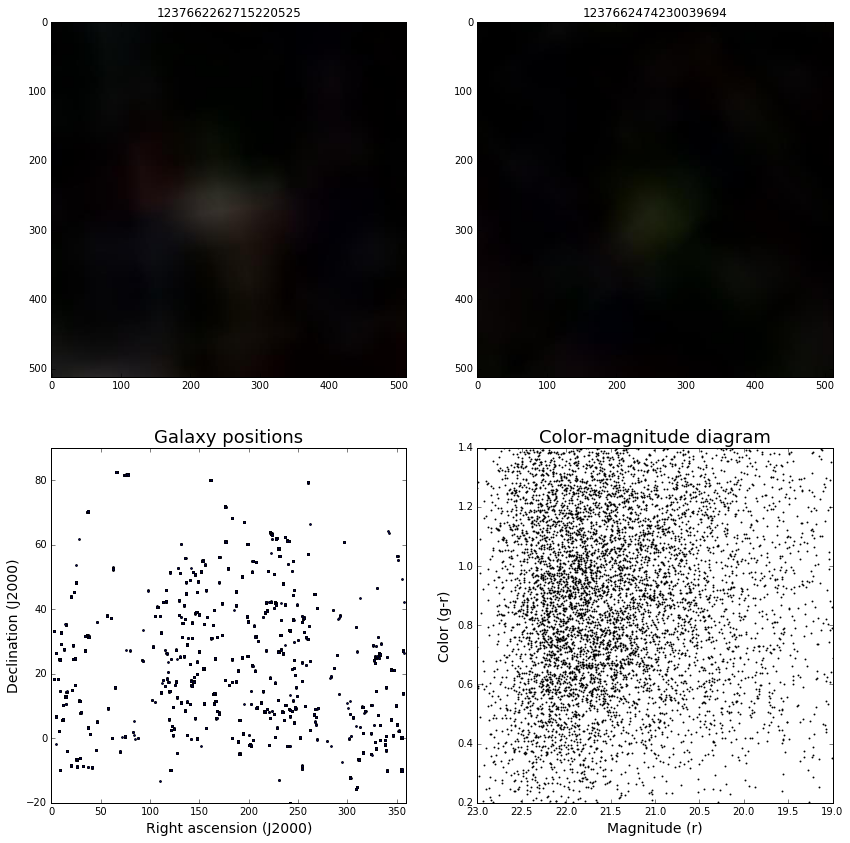

In [8]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
query = 'select top 10000 objid, ra, dec, petror90_r, g, r, g-r as color_gr '
query += 'from photoobj '
query += 'where clean=1 and type=3'
galaxies_df = CasJobs.executeQuery(query,'dr13')
galaxies_df = galaxies_df.set_index('objid')

sdsspixelscale=0.396
sample_galaxies_df = galaxies_df.sample(2)
plt.figure(figsize=(14,14))

subPlotNum = 1
nGalaxies = len(galaxies_df)
display(HTML('<h2>Galaxy analysis</h2>'))
display(HTML('<h3>Two sample images from {:,.0f} total</h3>'.format(nGalaxies)))
#display(HTML('<p>Estoy pensando...</p>'))
for index,this_sample_galaxy in sample_galaxies_df.iterrows():
    this_ra = this_sample_galaxy['ra']
    this_dec = this_sample_galaxy['dec']
    this_petror90_r = this_sample_galaxy['petror90_r']
    this_scale = 2 * sdsspixelscale * (this_petror90_r / 60)
    plt.subplot(2,2,subPlotNum)
    plt.imshow(SkyServer.getJpegImgCutout(this_ra, this_dec,scale=this_scale))# scale=0.7, width=512, height=512, opt='', query='', dataRelease=None))    # show the object identifier (objId) above the image.
    plt.title(index)
    subPlotNum += 1

plt.subplot(2,2,3)
#plt.subplot(2,2,1)
plt.scatter(galaxies_df['ra'], galaxies_df['dec'],s=3)
plt.axis([0, 360, -20, 90])
plt.title('Galaxy positions',fontsize=18)
plt.xlabel('Right ascension (J2000)',fontsize=14)
plt.ylabel('Declination (J2000)',fontsize=14)
plt.subplot(2,2,4)
#plt.subplot(2,2,2)
plt.scatter(galaxies_df['r'], galaxies_df['color_gr'],s=0.8)
plt.title('Color-magnitude diagram',fontsize=18)
plt.axis([23,19,0.2,1.4])
plt.xlabel('Magnitude (r)',fontsize=14)
plt.ylabel('Color (g-r)',fontsize=14)

plt.show()